# NBA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pprint
import time
import statistics
from sklearn.cluster import KMeans
from pylab import rcParams

%matplotlib inline
rcParams['figure.figsize'] = 40, 35
rcParams['lines.linewidth'] = 2
rcParams['font.size'] = 25

# Dataset cleaner
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    # return df[indices_to_keep].astype(np.float64)
    return df[indices_to_keep]

# NBA Team Stats

In [2]:
season = pd.read_csv("team_season_all.csv")
season.head(20)

,Team,Date,W/L,Home/Away,Score,FG%,FGM,FGA,3P%,3PM,...,FTA,REB,OREB,DREB,AST,STL,BLK,TOV,PF,PTS
0,CHI,1985-10-25,W,Home,CLE115-116CHI,0.453,43,95,0.250,1,...,41,53,21,32,29,8,8,20,33,116
1,CHI,1985-10-26,W,Home,DET118-121CHI,0.460,40,87,0.667,2,...,45,46,17,29,18,6,11,20,33,121
2,CHI,1985-10-29,W,Away,GSW105-111CHI,0.489,45,92,0.000,0,...,26,46,13,33,24,6,5,14,27,111
3,CHI,1985-10-31,L,Away,LAC120-112CHI,0.454,44,97,0.000,0,...,28,40,17,23,22,10,9,14,28,112
4,CHI,1985-11-02,L,Away,NAN118-100CHI,0.417,35,84,0.250,1,...,34,40,15,25,18,4,3,22,30,100
5,CHI,1985-11-06,L,Away,DET122-105CHI,0.456,41,90,0.500,2,...,27,40,19,21,24,8,5,26,29,105
6,CHI,1985-11-07,L,Away,BKN106-97CHI,0.367,36,98,0.500,5,...,29,54,22,32,16,6,3,20,28,97
7,CHI,1985-11-09,W,Away,NYK94-97CHI,0.479,35,73,0.333,1,...,31,40,13,27,18,6,6,19,15,97
8,CHI,1985-11-12,L,Home,MIL132-103CHI,0.420,37,88,0.200,1,...,36,46,19,27,24,2,6,18,27,103
9,CHI,1985-11-13,L,Away,NAN110-106CHI,0.517,46,89,0.500,2,...,17,40,13,27,34,1,4,11,25,106


In [3]:
# 3P% have NaN
season = clean_dataset(season)
season.head(20)

,Team,Date,W/L,Home/Away,Score,FG%,FGM,FGA,3P%,3PM,...,FTA,REB,OREB,DREB,AST,STL,BLK,TOV,PF,PTS
0,CHI,1985-10-25,W,Home,CLE115-116CHI,0.453,43,95,0.250,1,...,41,53,21,32,29,8,8,20,33,116
1,CHI,1985-10-26,W,Home,DET118-121CHI,0.460,40,87,0.667,2,...,45,46,17,29,18,6,11,20,33,121
2,CHI,1985-10-29,W,Away,GSW105-111CHI,0.489,45,92,0.000,0,...,26,46,13,33,24,6,5,14,27,111
3,CHI,1985-10-31,L,Away,LAC120-112CHI,0.454,44,97,0.000,0,...,28,40,17,23,22,10,9,14,28,112
4,CHI,1985-11-02,L,Away,NAN118-100CHI,0.417,35,84,0.250,1,...,34,40,15,25,18,4,3,22,30,100
5,CHI,1985-11-06,L,Away,DET122-105CHI,0.456,41,90,0.500,2,...,27,40,19,21,24,8,5,26,29,105
6,CHI,1985-11-07,L,Away,BKN106-97CHI,0.367,36,98,0.500,5,...,29,54,22,32,16,6,3,20,28,97
7,CHI,1985-11-09,W,Away,NYK94-97CHI,0.479,35,73,0.333,1,...,31,40,13,27,18,6,6,19,15,97
8,CHI,1985-11-12,L,Home,MIL132-103CHI,0.420,37,88,0.200,1,...,36,46,19,27,24,2,6,18,27,103
9,CHI,1985-11-13,L,Away,NAN110-106CHI,0.517,46,89,0.500,2,...,17,40,13,27,34,1,4,11,25,106


In [4]:
season.describe()

,FG%,FGM,FGA,3P%,3PM,3PA,FT%,FTM,FTA,REB,OREB,DREB,AST,STL,BLK,TOV,PF,PTS
count,68460.000000,68460.000000,68460.000000,68460.000000,68460.000000,68460.000000,68460.000000,68460.000000,68460.000000,68460.000000,68460.000000,68460.000000,68460.000000,68460.000000,68460.000000,68460.000000,68460.000000,68460.000000
mean,0.459596,38.004528,82.844084,0.341954,5.521063,15.635115,0.754258,19.153637,25.401753,42.484838,12.087219,30.397619,22.595589,7.916608,5.034531,14.540768,21.836868,100.683786
std,0.057885,5.672325,8.291997,0.153171,3.606883,8.184991,0.099820,6.610407,8.165373,6.703693,4.338118,5.428747,5.496473,3.041730,2.678704,4.137465,4.751261,12.991084
min,0.234000,16.000000,53.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,17.000000,0.000000,10.000000,3.000000,0.000000,0.000000,2.000000,5.000000,49.000000
25%,0.420000,34.000000,77.000000,0.250000,3.000000,10.000000,0.692000,14.000000,20.000000,38.000000,9.000000,27.000000,19.000000,6.000000,3.000000,12.000000,19.000000,92.000000
50%,0.458000,38.000000,82.000000,0.333000,5.000000,15.000000,0.760000,19.000000,25.000000,42.000000,12.000000,30.000000,22.000000,8.000000,5.000000,14.000000,22.000000,100.000000
75%,0.500000,42.000000,88.000000,0.429000,8.000000,21.000000,0.824000,23.000000,31.000000,47.000000,15.000000,34.000000,26.000000,10.000000,7.000000,17.000000,25.000000,109.000000
max,0.697000,67.000000,130.000000,1.000000,25.000000,61.000000,1.000000,61.000000,80.000000,81.000000,38.000000,56.000000,52.000000,25.000000,24.000000,40.000000,52.000000,173.000000


In [5]:
season.groupby('Team').describe()

3P%                                                             3PA  \
       count      mean       std  min     25%     50%     75%    max   count   
Team                                                                           
ATL   2640.0  0.333247  0.163400  0.0  0.2500  0.3330  0.4290  1.000  2640.0   
BKN    492.0  0.347701  0.103254  0.0  0.2800  0.3455  0.4170  0.696   492.0   
BOS   2636.0  0.334833  0.159435  0.0  0.2500  0.3330  0.4290  1.000  2636.0   
CHA   1132.0  0.343984  0.117467  0.0  0.2670  0.3330  0.4290  0.750  1132.0   
CHI   2640.0  0.341646  0.167549  0.0  0.2500  0.3330  0.4440  1.000  2640.0   
CLE   2643.0  0.352998  0.160752  0.0  0.2500  0.3530  0.4440  1.000  2643.0   
DAL   2657.0  0.348186  0.140928  0.0  0.2670  0.3480  0.4350  1.000  2657.0   
DEN   2641.0  0.326930  0.152961  0.0  0.2380  0.3330  0.4170  1.000  2641.0   
DET   2620.0  0.334834  0.166054  0.0  0.2500  0.3330  0.4290  1.000  2620.0   
GSW   2645.0  0.341816  0.149672  0.0  0.2500  0.3450  0.4380  1.000  2645.0   
HOU   2645.0  0.339584  0.141858  0.0  0.2630  0.3410  0.4290  1.000  2645.0   
IND   2630.0  0.348686  0.153725  0.0  0.2500  0.3530  0.4395  1.000  2630.0   
LAC   2619.0  0.318927  0.172060  0.0  0.2220  0.3330  0.4190  1.000  2619.0   
LAL   2656.0  0.341456  0.148982  0.0  0.2500  0.3330  0.4290  1.000  2656.0   
MEM   1378.0  0.343247  0.126417  0.0  0.2595  0.3330  0.4290  0.833  1378.0   
MIA   2406.0  0.348547  0.149453  0.0  0.2630  0.3460  0.4330  1.000  2406.0   
MIL   2652.0  0.349009  0.148791  0.0  0.2500  0.3530  0.4380  1.000  2652.0   
MIN   2326.0  0.332461  0.155425  0.0  0.2380  0.3330  0.4290  1.000  2326.0   
NOP   1296.0  0.355184  0.121763  0.0  0.2780  0.3530  0.4330  0.800  1296.0   
NYK   2641.0  0.349404  0.153483  0.0  0.2500  0.3460  0.4380  1.000  2641.0   
OKC    804.0  0.349461  0.111744  0.0  0.2730  0.3480  0.4175  0.682   804.0   
ORL   2328.0  0.349890  0.131681  0.0  0.2730  0.3530  0.4290  1.000  2328.0   
PHI   2648.0  0.326203  0.161687  0.0  0.2310  0.3330  0.4210  1.000  2648.0   
PHX   2629.0  0.343571  0.160894  0.0  0.2500  0.3500  0.4350  1.000  2629.0   
POR   2646.0  0.346297  0.154352  0.0  0.2500  0.3500  0.4350  1.000  2646.0   
SAC   2634.0  0.346736  0.156716  0.0  0.2500  0.3500  0.4440  1.000  2634.0   
SAS   2627.0  0.344104  0.173739  0.0  0.2500  0.3500  0.4440  1.000  2627.0   
TOR   1838.0  0.356220  0.118267  0.0  0.2765  0.3570  0.4350  0.786  1838.0   
UTA   2637.0  0.341044  0.176490  0.0  0.2400  0.3330  0.4480  1.000  2637.0   
WAS   1674.0  0.347258  0.129811  0.0  0.2670  0.3450  0.4290  0.833  1674.0   

                 ...    STL           TOV                                  \
           mean  ...    75%   max   count       mean       std  min   25%   
Team             ...                                                        
ATL   15.287500  ...   10.0  23.0  2640.0  14.642803  3.868047  4.0  12.0   
BKN   25.081301  ...    9.0  19.0   492.0  14.288618  3.767428  6.0  12.0   
BOS   15.594082  ...   10.0  21.0  2636.0  14.718513  3.864554  3.0  12.0   
CHA   18.599823  ...    9.0  20.0  1132.0  13.117491  3.839551  2.0  11.0   
CHI   13.599242  ...   10.0  19.0  2640.0  14.396212  4.114207  3.0  11.0   
CLE   14.869467  ...    9.0  20.0  2643.0  14.313659  4.120212  2.0  11.0   
DAL   16.645088  ...    9.0  20.0  2657.0  13.552126  4.041251  3.0  11.0   
DEN   15.269973  ...   10.0  20.0  2641.0  14.944718  4.158595  4.0  12.0   
DET   14.369466  ...    9.0  19.0  2620.0  13.705344  4.045112  3.0  11.0   
GSW   16.636673  ...   10.0  25.0  2645.0  15.401890  4.114832  5.0  12.0   
HOU   19.323629  ...   10.0  20.0  2645.0  15.093762  4.243031  4.0  12.0   
IND   15.203802  ...    9.0  18.0  2630.0  14.831179  4.129652  4.0  12.0   
LAC   14.191676  ...   10.0  22.0  2619.0  15.171058  4.397607  3.0  12.0   
LAL   16.111822  ...   10.0  20.0  2656.0  14.228916  4.072360  3.0  11.0   
MEM   16.792453  ...   10.0  22.0  1378.0  13.941945  3.857

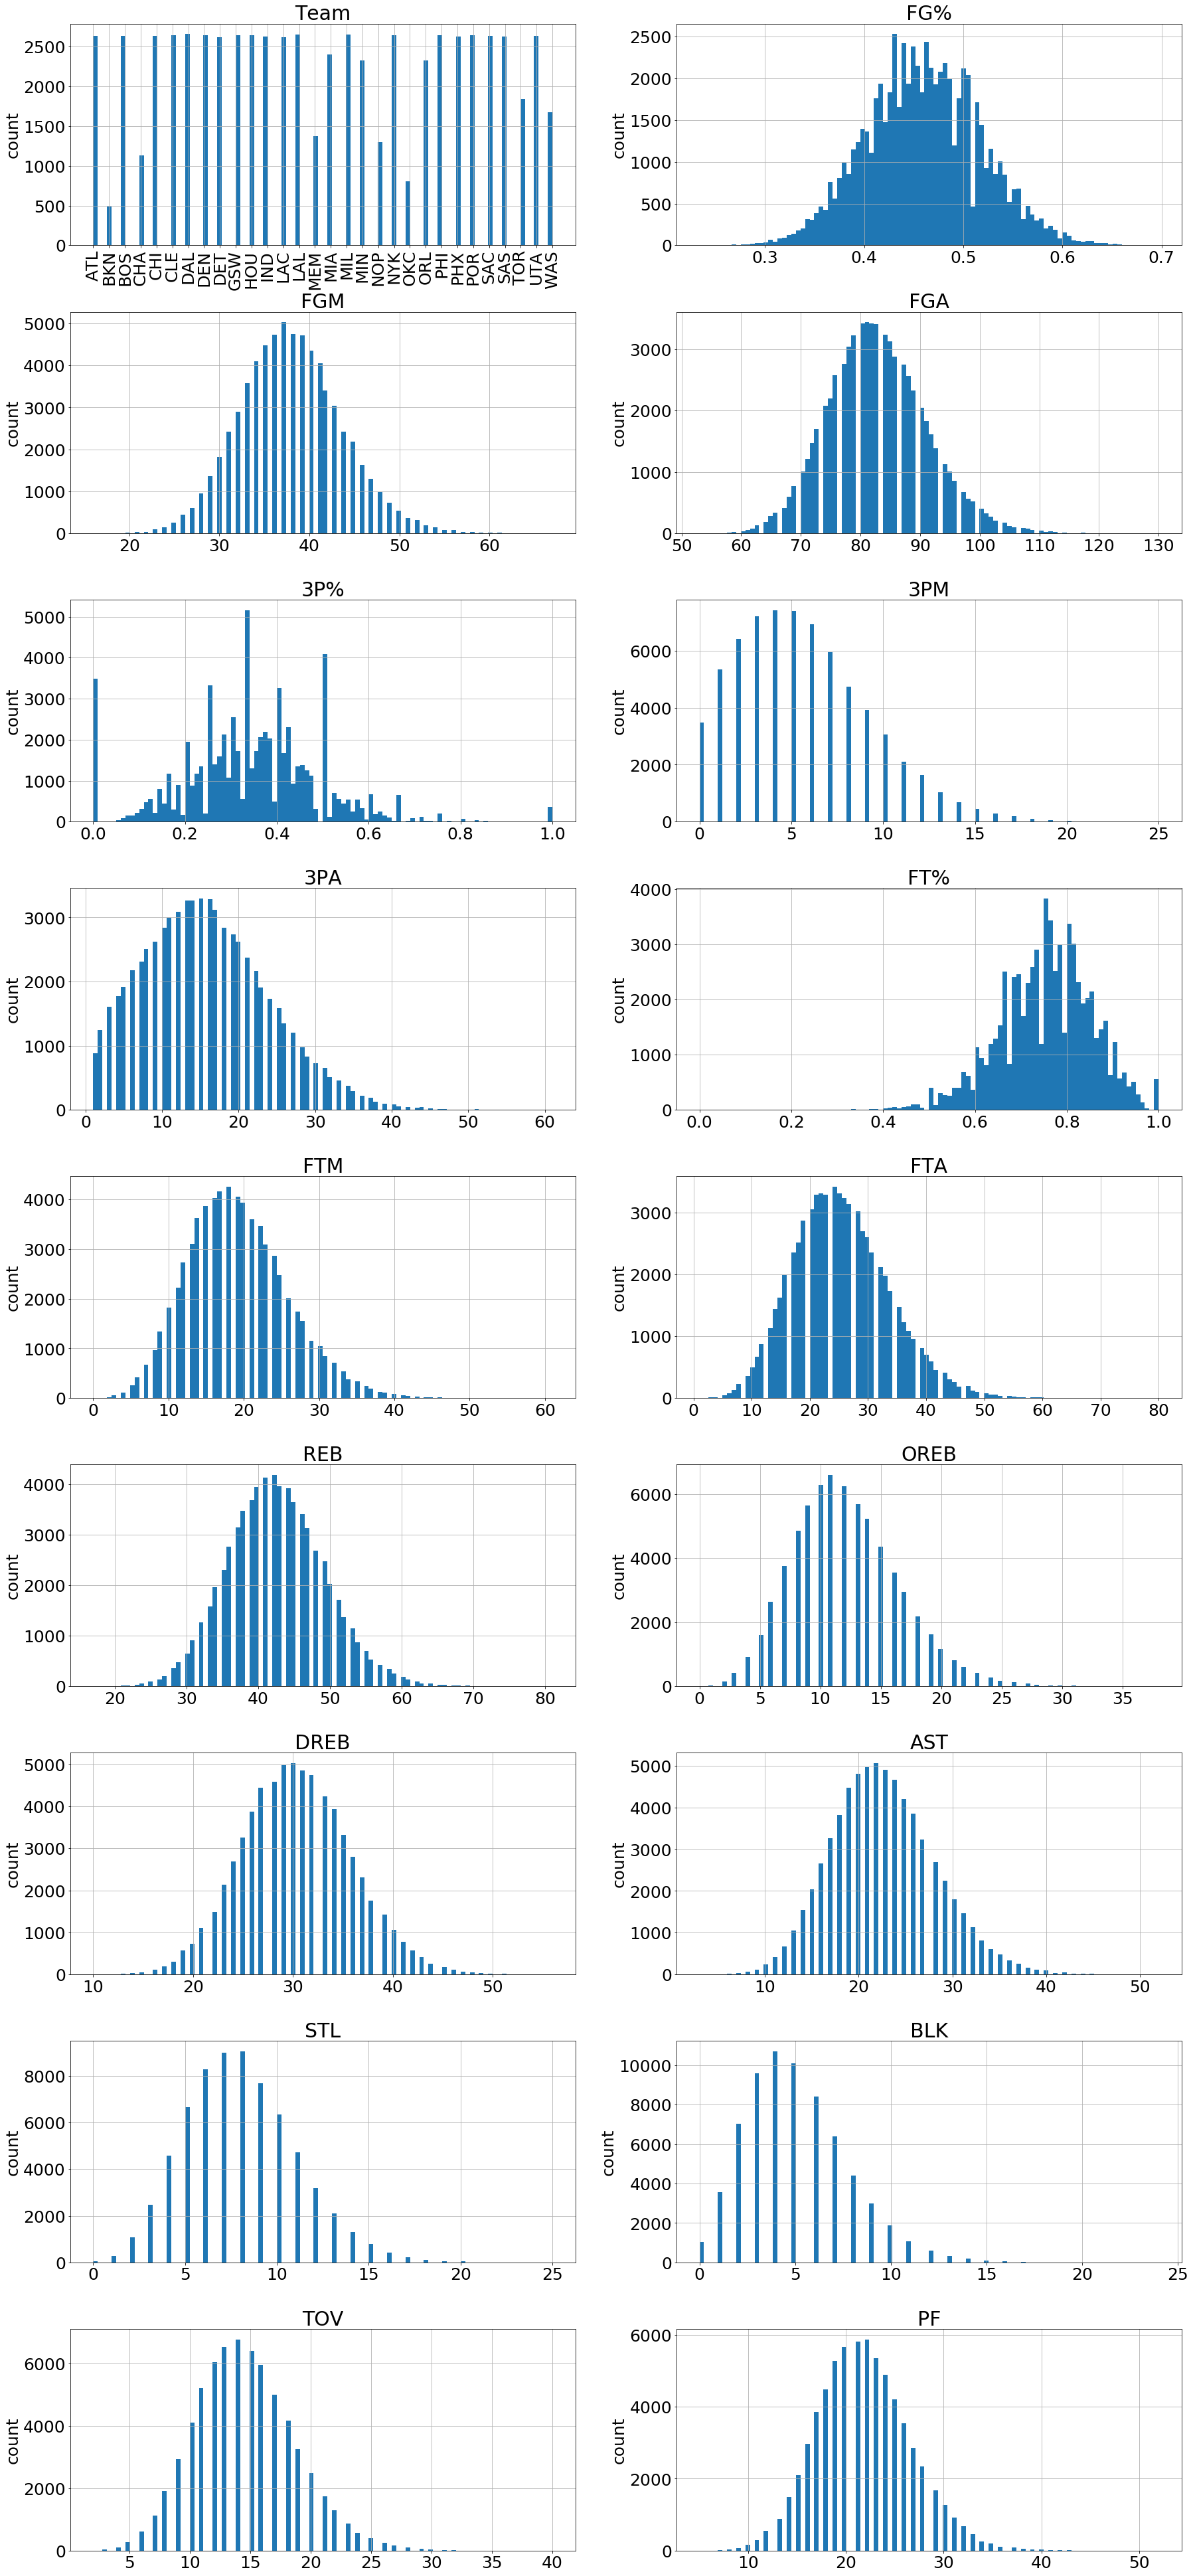

In [6]:
fig, ax = plt.subplots(figsize=(30, 70))
plt.rcParams.update({'font.size': 25})
fig.subplots_adjust(hspace=.3)

numOfPlot = 18
row = int(numOfPlot/2)
col = 2
kk = 1

for item in season:
    if item == 'Date' or item == 'W/L' or item == 'Home/Away' or item == 'Score':
        continue
    else:
        plt.subplot(row, col, kk)
        season[item].hist(bins = 100)
        if item == 'Team':
            plt.xticks(rotation='vertical')
        plt.title(item)
        plt.ylabel('count')
        kk += 1
        if kk > numOfPlot:
            break

Text(0,0.5,'count')

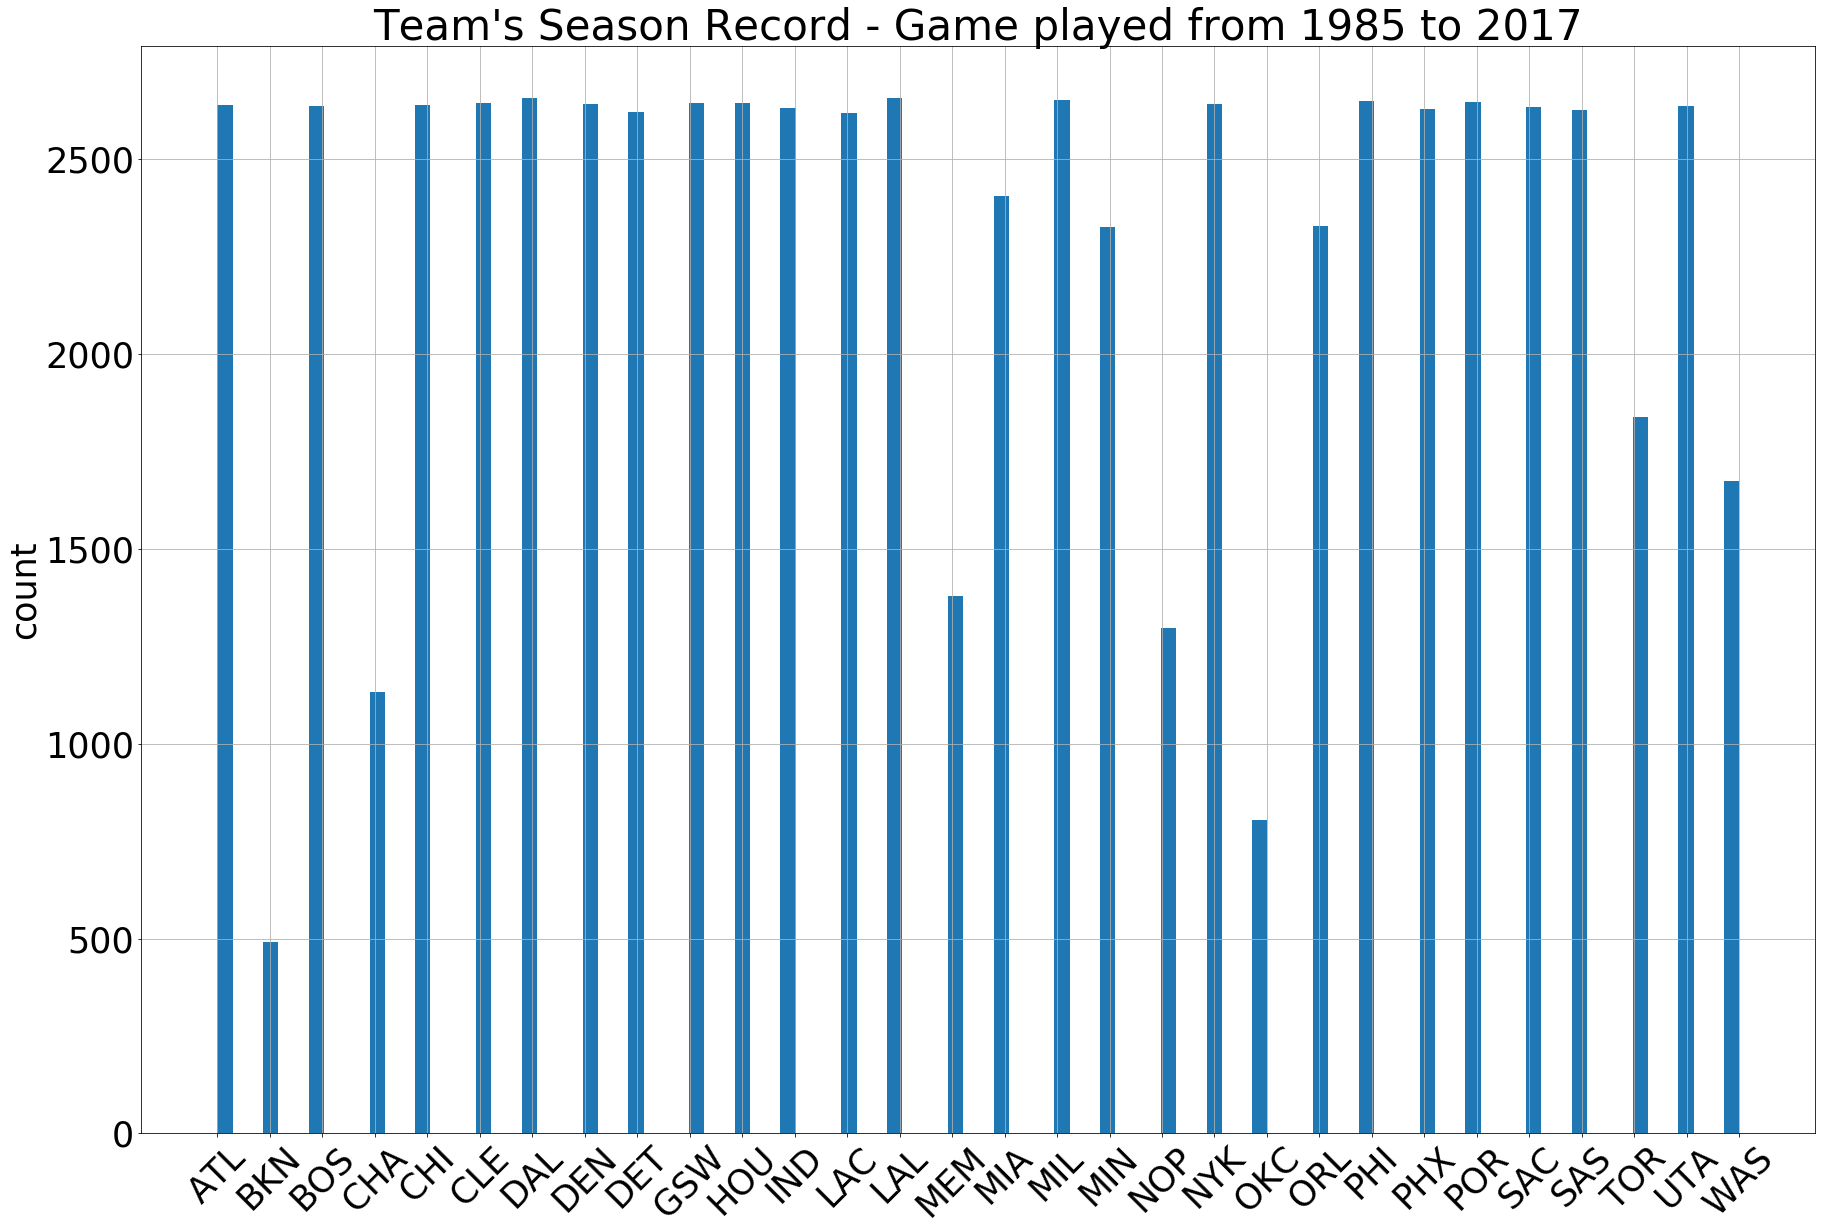

In [7]:
plt.figure(figsize=(30, 20))
plt.rcParams.update({'font.size': 35})

season['Team'].hist(bins = 100)
plt.xticks(rotation='45')
plt.title('Team\'s Season Record - Game played from 1985 to 2017')
plt.ylabel('count')

In [8]:
playoff = pd.read_csv("team_playoff_all.csv")
playoff.head(20)

,Team,Date,W/L,Home/Away,Score,FG%,FGM,FGA,3P%,3PM,...,FTA,REB,OREB,DREB,AST,STL,BLK,TOV,PF,PTS
0,CHI,1986-04-17,L,Away,BOS123-104CHI,0.488,42,86,0.500,1,...,23,30,11,19,17,8,2,17,30,104
1,CHI,1986-04-20,L,Away,BOS135-131CHI,0.461,47,102,0.000,0,...,46,44,14,30,15,9,4,11,34,131
2,CHI,1986-04-22,L,Home,BOS122-104CHI,0.438,39,89,0.250,1,...,36,45,16,29,19,7,5,15,28,104
3,CHI,1987-04-23,L,Away,BOS108-104CHI,0.487,38,78,0.333,1,...,28,30,8,22,26,5,3,9,22,104
4,CHI,1987-04-26,L,Away,BOS105-96CHI,0.442,34,77,0.571,4,...,28,38,12,26,14,1,4,15,25,96
5,CHI,1987-04-28,L,Home,BOS105-94CHI,0.386,34,88,0.333,2,...,32,46,19,27,24,11,6,10,29,94
6,CHI,1988-04-28,W,Home,CLE93-104CHI,0.467,43,92,0.000,0,...,19,50,18,32,21,9,6,16,24,104
7,CHI,1988-05-01,W,Home,CLE101-106CHI,0.443,47,106,0.000,0,...,14,57,24,33,30,7,2,10,20,106
8,CHI,1988-05-03,L,Away,CLE110-102CHI,0.464,39,84,0.000,0,...,25,29,12,17,24,6,4,8,28,102
9,CHI,1988-05-05,L,Away,CLE97-91CHI,0.453,39,86,0.000,0,...,17,41,13,28,19,9,5,13,26,91


In [9]:
playoff.describe()

,FG%,FGM,FGA,3P%,3PM,3PA,FT%,FTM,FTA,REB,OREB,DREB,AST,STL,BLK,TOV,PF,PTS
count,4654.000000,4654.000000,4654.000000,4650.000000,4654.000000,4654.000000,4654.000000,4654.000000,4654.000000,4654.000000,4654.000000,4654.000000,4654.000000,4654.000000,4654.000000,4654.000000,4654.000000,4654.000000
mean,0.451962,36.037172,79.841427,0.337523,5.600774,16.131500,0.752704,20.168457,26.802965,41.452944,11.650193,29.802750,20.882682,7.268586,4.974860,13.320584,23.188655,97.843575
std,0.059139,5.753601,8.315105,0.144304,3.509841,7.900895,0.100516,6.765545,8.351641,6.537748,4.238599,5.199252,5.425777,2.817017,2.588891,3.818291,4.652423,13.328691
min,0.244000,17.000000,51.000000,0.000000,0.000000,0.000000,0.286000,2.000000,5.000000,18.000000,1.000000,12.000000,3.000000,0.000000,0.000000,3.000000,9.000000,54.000000
25%,0.412000,32.000000,74.000000,0.250000,3.000000,10.000000,0.690000,15.000000,21.000000,37.000000,9.000000,26.000000,17.000000,5.000000,3.000000,11.000000,20.000000,88.000000
50%,0.451000,36.000000,79.000000,0.333000,5.000000,16.000000,0.760000,20.000000,26.000000,41.000000,11.000000,30.000000,20.000000,7.000000,5.000000,13.000000,23.000000,97.000000
75%,0.493000,40.000000,85.000000,0.429000,8.000000,21.000000,0.818000,24.000000,32.000000,46.000000,14.000000,33.000000,24.000000,9.000000,7.000000,16.000000,26.000000,106.000000
max,0.670000,63.000000,130.000000,1.000000,25.000000,50.000000,1.000000,57.000000,64.000000,68.000000,28.000000,50.000000,46.000000,20.000000,19.000000,33.000000,41.000000,157.000000


In [10]:
playoff['Team'].unique()

array(['CHI', 'HOU', 'SAS', 'DAL', 'MEM', 'NOP', 'GSW', 'LAC', 'SAC',
       'PHX', 'LAL', 'OKC', 'POR', 'UTA', 'DEN', 'MIN', 'TOR', 'BOS',
       'NYK', 'BKN', 'PHI', 'MIA', 'ATL', 'CHA', 'WAS', 'ORL', 'CLE',
       'IND', 'DET', 'MIL'], dtype=object)

In [11]:
playoff.groupby('Team').describe()

3P%                                                              \
      count      mean       std    min      25%     50%      75%    max   
Team                                                                      
ATL   182.0  0.309995  0.152470  0.000  0.21400  0.3105  0.39050  1.000   
BKN    25.0  0.336440  0.100030  0.167  0.28600  0.3330  0.37500  0.600   
BOS   259.0  0.321154  0.176675  0.000  0.22050  0.3160  0.43650  1.000   
CHA    15.0  0.312933  0.107313  0.063  0.25650  0.2940  0.38500  0.500   
CHI   276.0  0.341667  0.166051  0.000  0.25000  0.3330  0.42900  1.000   
CLE   185.0  0.344654  0.129993  0.000  0.26100  0.3500  0.42900  0.700   
DAL   182.0  0.348863  0.150022  0.000  0.26400  0.3500  0.42100  1.000   
DEN   109.0  0.317349  0.148945  0.000  0.22700  0.3130  0.42300  0.667   
DET   247.0  0.317737  0.161713  0.000  0.21400  0.3330  0.42100  0.750   
GSW   126.0  0.370397  0.109891  0.000  0.30800  0.3725  0.43725  0.667   
HOU   217.0  0.326203  0.143855  0.000  0.26100  0.3330  0.40000  1.000   
IND   224.0  0.352210  0.124184  0.000  0.26700  0.3570  0.42900  0.692   
LAC    82.0  0.350817  0.164238  0.000  0.25175  0.3330  0.44175  1.000   
LAL   349.0  0.342926  0.151759  0.000  0.25000  0.3330  0.44000  1.000   
MEM    75.0  0.312947  0.124678  0.000  0.25000  0.3130  0.38000  0.688   
MIA   219.0  0.350128  0.114710  0.000  0.27300  0.3570  0.42100  0.727   
MIL   112.0  0.325687  0.157806  0.000  0.23175  0.3105  0.43725  0.800   
MIN    47.0  0.355362  0.118111  0.125  0.27950  0.3570  0.43450  0.636   
NOP    40.0  0.348100  0.123915  0.133  0.26275  0.3500  0.41625  0.588   
NYK   183.0  0.340284  0.128604  0.000  0.25000  0.3330  0.40000  0.800   
OKC    96.0  0.333031  0.101898  0.059  0.26300  0.3330  0.39300  0.579   
ORL   123.0  0.349813  0.101930  0.087  0.27950  0.3530  0.42100  0.619   
PHI   130.0  0.292392  0.159855  0.000  0.16700  0.3000  0.40000  0.667   
PHX   186.0  0.351371  0.128500  0.000  0.26850  0.3515  0.42900  0.750   
POR   188.0  0.330686  0.134402  0.000  0.25000  0.3480  0.42900  0.750   
SAC    76.0  0.327355  0.124370  0.000  0.24750  0.3180  0.40225  0.667   
SAS   334.0  0.355569  0.144474  0.000  0.28600  0.3530  0.44300  1.000   
TOR    72.0  0.326667  0.117366  0.111  0.23625  0.3115  0.40225  0.667   
UTA   231.0  0.348429  0.173901  0.000  0.25000  0.3330  0.45500  1.000   
WAS    60.0  0.327533  0.103784  0.111  0.25000  0.3190  0.40000  0.625   

        3PA             ...     STL          TOV                            \
      count       mean  ...     75%   max  count       mean       std  min   
Team                    ...                                                  
ATL   182.0  16.675824  ...    9.00  13.0  182.0  12.956044  3.391286  5.0   
BKN    25.0  22.080000  ...    8.00  14.0   25.0  12.080000  3.067572  8.0   
BOS   259.0  15.208494  ...    9.00  18.0  259.0  13.610039  3.717554  4.0   
CHA    15.0  18.866667  ...    7.00  10.0   15.0  11.400000  4.032015  3.0   
CHI   276.0  13.804348  ...   10.00  19.0  276.0  13.043478  3.677686  4.0   
CLE   185.0  19.367568  ...    9.00  15.0  185.0  12.924324  3.624299  4.0   
DAL   182.0  17.445055  ...    8.75  19.0  182.0  12.642857  3.126951  5.0   
DEN   109.0  14.486239  ...    9.00  15.0  109.0  13.174312  3.471695  5.0   
DET   249.0  12.164659  ...    9.00  16.0  249.0  12.546185  3.703594  3.0   
GSW   126.0  24.841270  ...   11.00  16.0  126.0  14.293651  3.917280  4.0   
HOU   218.0  19.119266  ...    9.00  16.0  218.0  14.128440  3.725862  5.0   
IND   224.0  16.500000  ...    8.00  19.0  224.0  14.084821  4.007498  4.0   
LAC    82.0  18.524390  ...   10.00  15.0   82.0  12.743902  3.796720  6.0   
LAL   349.0  14.750716  ...    9.00  17.0  349.0  13.277937  3.633354  5.0   
MEM    75.0  14.786667  ...    9.00  14.0   75.0  11.840000  3.959388  3.0   
MIA   219.0  18.913242  ...    8.00  15.0  219.0  13.484018  4.134601  5.0   
MIL   112.0  13.035714  ...    9.00  20.0  112.0  

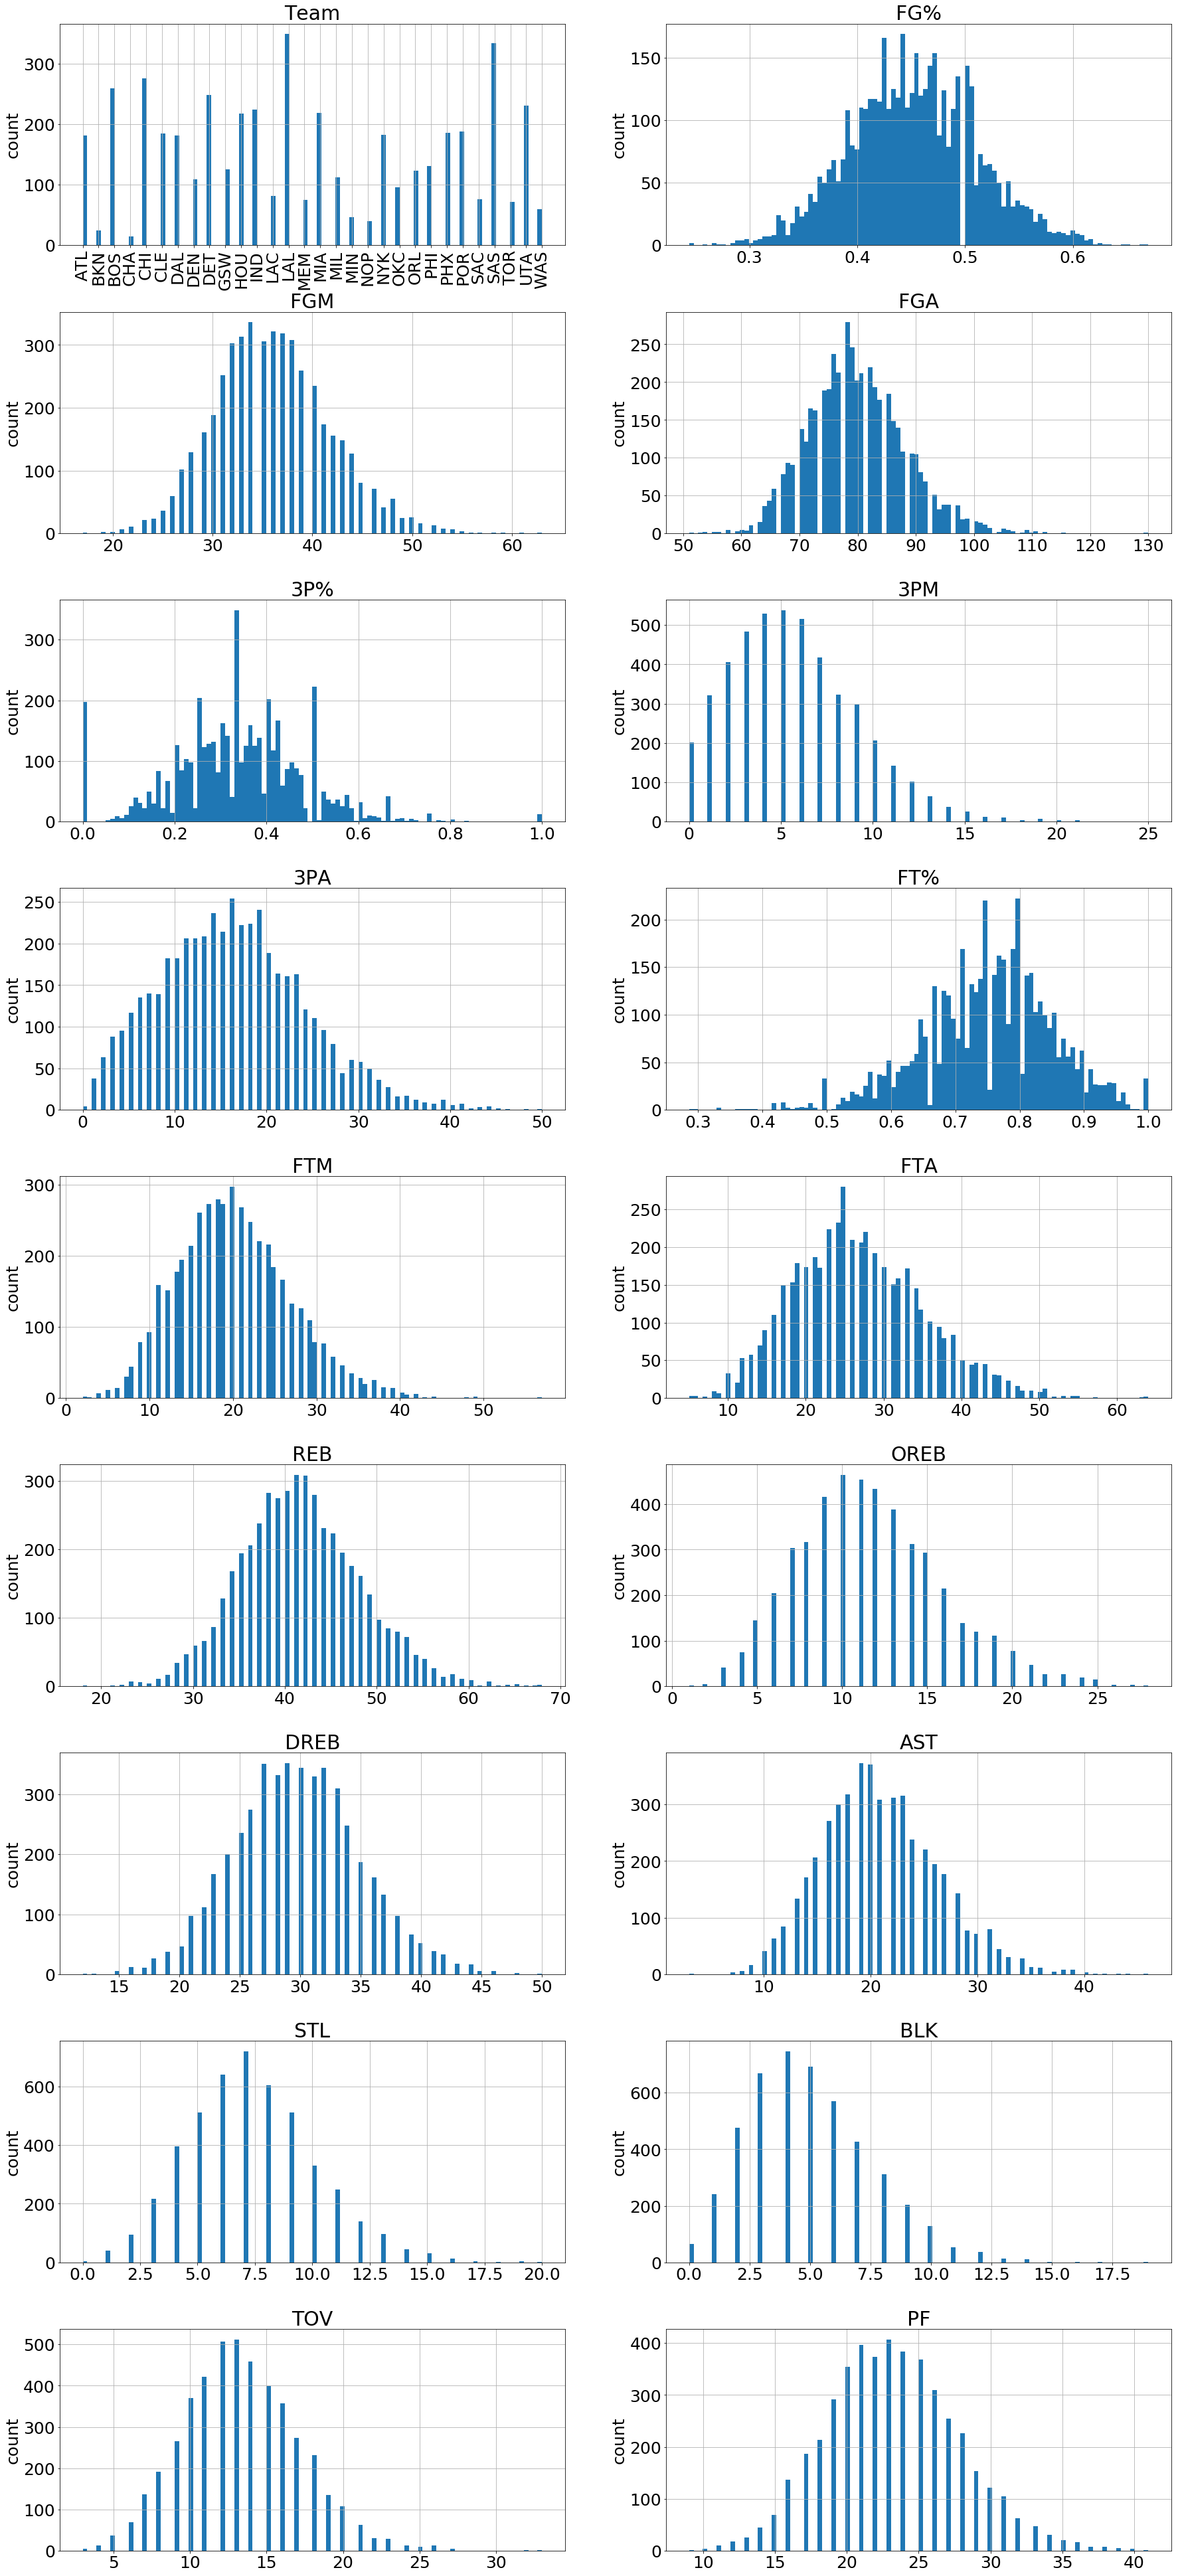

In [12]:
fig, ax = plt.subplots(figsize=(30, 70))
plt.rcParams.update({'font.size': 25})
fig.subplots_adjust(hspace=.3)

numOfPlot = 18
row = int(numOfPlot/2)
col = 2
kk = 1

for item in playoff:
    if item == 'Date' or item == 'W/L' or item == 'Home/Away' or item == 'Score':
        continue
    else:
        plt.subplot(row, col, kk)
        playoff[item].hist(bins = 100)
        if item == 'Team':
            plt.xticks(rotation='vertical')
        plt.title(item)
        plt.ylabel('count')
        kk += 1
        if kk > numOfPlot:
            break

Text(0,0.5,'count')

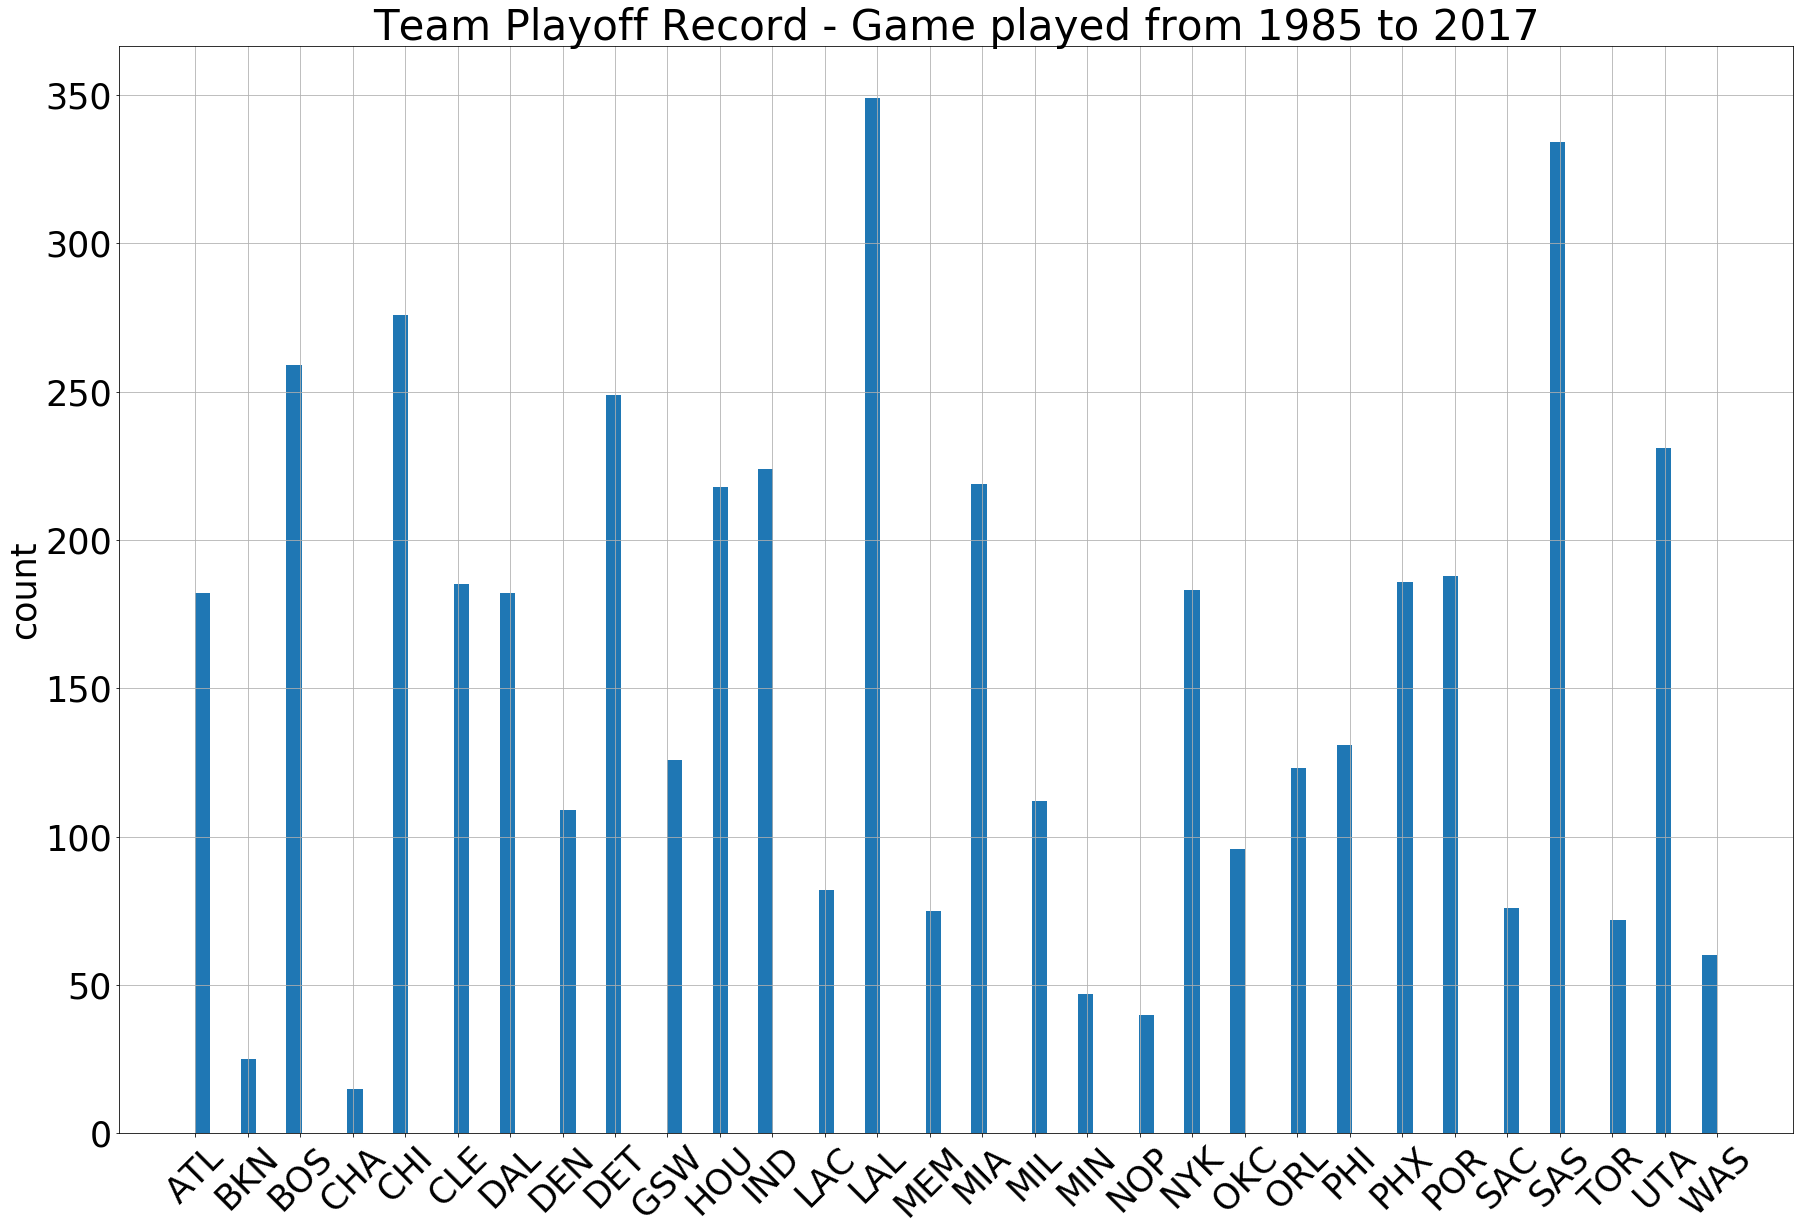

In [13]:
plt.figure(figsize=(30, 20))
plt.rcParams.update({'font.size': 35})

playoff['Team'].hist(bins = 100)
plt.xticks(rotation='45')
plt.title('Team Playoff Record - Game played from 1985 to 2017')
plt.ylabel('count')